In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [3]:
import cv2 as cv
from dataclasses import dataclass
from pathlib import Path
import requests
from tqdm.notebook import tqdm

@dataclass
class ImageInfo:
    image_path: Path
    url: str
    img: cv.Mat|None = None

    def download(self) -> cv.Mat:
        headers = {'User-Agent': 'ComputerVisionExperiments/0.0 (https://github.com/seafoodfry/ml-workspace/tree/main/gpu-sandbox/vision)'}
        response = requests.get(self.url, headers=headers)
        response.raise_for_status()

        img_data = response.content
        with open(self.image_path, 'wb') as f:
            f.write(img_data)
    
        # Opencv reads images in BGR.
        self.img = cv.imread(self.image_path, cv.IMREAD_UNCHANGED)

    def rgb(self) -> cv.Mat:
        return cv.cvtColor(self.img, cv.COLOR_BGR2RGB)


class ImageCache:
    def __init__(self, base_path: str = './img/workbench-images'):
        self._base_path = Path(base_path)
        self._base_path.mkdir(parents=True, exist_ok=True)
        
        self._cache: dict[str, ImageInfo] = {
            'jp-sign': ImageInfo( # https://japantravel.navitime.com/en/area/jp/guide/NTJnews0429-en/
                image_path=self._base_path / 'jp-sign.webp',
                url='https://article-image.travel.navitime.jp/img/NTJnews0429-en/main.webp',
            ),
            'jp-lights': ImageInfo( # https://japantravel.navitime.com/en/area/jp/guide/NTJnews0429-en/
                image_path=self._base_path / 'jp-lights.webp',
                url='https://article-image.travel.navitime.jp/img/NTJnews0429-en/left2.webp',
            )
        }
        for img_key, img in tqdm(self._cache.items(), desc="Downloading images"):
            img.download()

    def images(self):
        """Return all the image names registered."""
        return self._cache.keys()

    def __getitem__(self, img_name: str) -> ImageInfo:
        """Allow dictionary-like access to loaded images."""
        if img_name not in self._cache:
            self.load_img(img_name)
        return self._cache[img_name]

    def cwd(self):
        return self._base_path


CACHE = ImageCache()

# Croping Images and Converting from WEBP to PNG

In [20]:
!ls img/workbench-images/

jp-light.png   jp-lights.png  jp-lights.webp jp-sign.png    jp-sign.webp


In [4]:
jp_sign = CACHE['jp-sign'].img
jp_sign.shape

(961, 1440, 3)

In [5]:
jp_sign[0, 0]

array([247, 173, 115], dtype=uint8)

In [6]:
# Getting the image from the path.
#jp_sign = cv.imread(CACHE['jp-sign'].image_path, cv.IMREAD_UNCHANGED)
#jp_sign.shape

In [7]:
# Save as PNG.
jp_sign_png_path = CACHE.cwd() / 'jp-sign.png'
cv.imwrite(jp_sign_png_path, jp_sign)

True

In [8]:
!ls img/workbench-images/

jp-light.png   jp-lights.png  jp-lights.webp jp-sign.png    jp-sign.webp


In [9]:
jp_sign = cv.imread(jp_sign_png_path, cv.IMREAD_UNCHANGED)
jp_sign.shape

(961, 1440, 3)

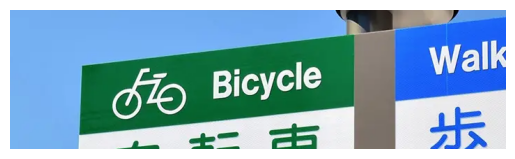

height: 200, width: 712


In [10]:
_x_start = 100
_x_end = _x_start + 512
_y_start = 100
_y_end = _y_start + 200
_img_rgb = cv.cvtColor(jp_sign[_y_start:_y_end, _x_start:_x_end+200], cv.COLOR_BGR2RGB)

plt.imshow(_img_rgb)
plt.axis('off')
plt.show()

print(f'height: {_img_rgb.shape[0]}, width: {_img_rgb.shape[1]}')

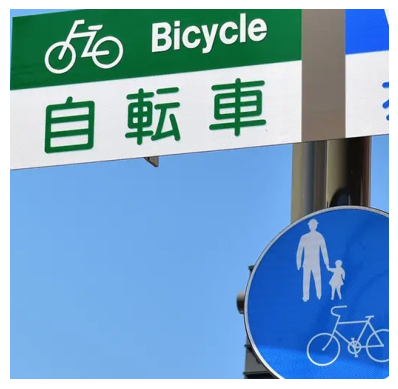

height: 500, width: 512


In [31]:
x_start = 200
x_end = x_start + 512
y_start = 170
y_end = y_start + 500
img_rgb = cv.cvtColor(jp_sign[y_start:y_end, x_start:x_end], cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

print(f'height: {img_rgb.shape[0]}, width: {img_rgb.shape[1]}')

In [32]:
cv.imwrite('/tmp/jp-sign.png', cv.cvtColor(img_rgb, cv.COLOR_RGB2BGR))

True

In [12]:
def webp_to_png(image: np.ndarray, png_path: Path|str) -> np.ndarray:
    print(f'input image shape: {image.shape}')
    print(f'height: {image.shape[0]}, width: {image.shape[1]}')

    print(f'writing {png_path}...')
    cv.imwrite(png_path, image)

In [13]:
_input_img = CACHE['jp-sign'].img
_png_path = CACHE.cwd() / 'jp-sign.png'
webp_to_png(_input_img, _png_path)

input image shape: (961, 1440, 3)
height: 961, width: 1440
writing img/workbench-images/jp-sign.png...


In [14]:
_input_img = CACHE['jp-lights'].img
_png_path = CACHE.cwd() / 'jp-lights.png'
webp_to_png(_input_img, _png_path)

input image shape: (424, 640, 3)
height: 424, width: 640
writing img/workbench-images/jp-lights.png...


In [15]:
jp_lights = cv.imread(_png_path, cv.IMREAD_UNCHANGED)
jp_lights.shape

(424, 640, 3)

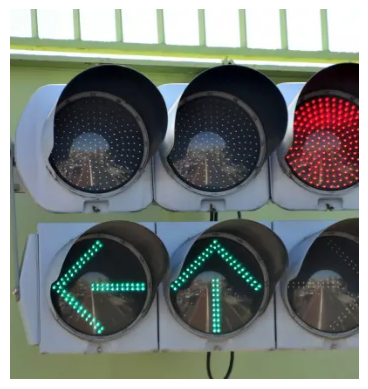

height: 424, width: 400


In [33]:
x_start = 80
x_end = x_start + 400
y_start = 0
y_end = y_start + 424
img_rgb = cv.cvtColor(jp_lights[y_start:y_end, x_start:x_end], cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

print(f'height: {img_rgb.shape[0]}, width: {img_rgb.shape[1]}')

In [34]:
cv.imwrite('/tmp/jp-lights.png', cv.cvtColor(img_rgb, cv.COLOR_RGB2BGR))

True